In [1]:
#@title Pre modelling step (building the dataframe to be used in the modelling process)


In [2]:
# We import the required libraries
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns
from matplotlib import pyplot

In [3]:
# We upload the excel file (the file that is generated after applying the outlier removal and imputation process)
#In the Github repository we go to: Organized Data ==> Data ==> 10259_after_outlier_removal& Imputation.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259_after_outlier_removal& Imputation.xlsx to 10259_after_outlier_removal& Imputation.xlsx


In [4]:
# Convert the excel file into pandas Dataframe
import io 
df = pd.read_excel(io.BytesIO(uploaded['10259_after_outlier_removal& Imputation.xlsx']))
# We round the columns (POWER , Temperature, Irradiation.flux) to one decimal place.
df['Temperature']=df['Temperature'].round(1)
df['Irradiation.flux']=df['Irradiation.flux'].round(1)
df




,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,POWER1
0,2019-01-01 00:00:00,1,1,1,2019,1,0,TUE,-1.2,4.2,23.20
1,2019-01-01 01:00:00,1,1,1,2019,2,1,TUE,-0.9,4.2,18.40
2,2019-01-01 02:00:00,1,1,1,2019,3,2,TUE,-0.8,4.1,18.90
3,2019-01-01 03:00:00,1,1,1,2019,4,3,TUE,-0.6,4.0,21.40
4,2019-01-01 04:00:00,1,1,1,2019,5,4,TUE,-0.1,4.9,18.83
...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,18.10
8756,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,17.90
8757,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,22.40
8758,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,17.50


In [5]:
# After creating the new dataframe, we link it to calendar data. To carry out this step :  
# We download the calendar data excel file
from google.colab import files
uploaded = files.upload()

Saving calendar Data .xlsx to calendar Data .xlsx


In [6]:
# Convert the calendar data excel file into Dataframe
import io 
cal = pd.read_excel(io.BytesIO(uploaded['calendar Data .xlsx']))
#In the "Bank Holidays" column we replace the NaN value with zeros.
cal['Bank Holidays'] = cal['Bank Holidays'].fillna(0)
# we remove the "READ_DATE" and "Week_Day" columns to avoid the Repetition of these column when linking it to the dataframe "df" 
remove_column = cal.pop('READ_DATE')
remove2_column = cal.pop('Week_Day')
cal

,Hour_day,Tuesday 0h,Tuesday 1h,Tuesday 2h,Tuesday 3h,Tuesday 4h,Tuesday 5h,Tuesday 6h,Tuesday 7h,Tuesday 8h,...,Monday 15h,Monday 16h,Monday 17h,Monday 18h,Monday 19h,Monday 20h,Monday 21h,Monday 22h,Monday 23h,Bank Holidays
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8756,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8757,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8758,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [7]:
#we join the calendar dataframe with the original dataset (10259_after_outlier_removal& Imputation, df)

df_cal = pd.concat([df,cal], axis=1, join='inner')
df_cal = df_cal[24:]   # Delete the first 24 rows
df_cal.shape
df_cal

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Monday 15h,Monday 16h,Monday 17h,Monday 18h,Monday 19h,Monday 20h,Monday 21h,Monday 22h,Monday 23h,Bank Holidays
24,2019-01-02 00:00:00,2,2,1,2019,25,0,WED,1.7,2.2,...,0,0,0,0,0,0,0,0,0,0.0
25,2019-01-02 01:00:00,2,2,1,2019,26,1,WED,1.8,3.2,...,0,0,0,0,0,0,0,0,0,0.0
26,2019-01-02 02:00:00,2,2,1,2019,27,2,WED,1.8,3.3,...,0,0,0,0,0,0,0,0,0,0.0
27,2019-01-02 03:00:00,2,2,1,2019,28,3,WED,1.2,2.9,...,0,0,0,0,0,0,0,0,0,0.0
28,2019-01-02 04:00:00,2,2,1,2019,29,4,WED,0.8,3.5,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,0,0,0,0,0,0,0,0,0,0.0
8756,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,0,0,0,0,0,0,0,0,0,0.0
8757,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,0,0,0,0,0,0,0,0,0,0.0
8758,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,0,0,0,0,0,0,0,0,0,0.0


In [8]:
# We create multiple POWER lagged columns (we choose 12 power lagged values) 
lagged1 = pd.concat([df['POWER1'].shift(lag).rename('{}_lag{}'.format(df['POWER1'].name, lag)) for lag in range(13)], axis=1)
# we convert the integers to float and drop the the nan values.
L1=lagged1.dropna().astype(float)
L1

,POWER1_lag0,POWER1_lag1,POWER1_lag2,POWER1_lag3,POWER1_lag4,POWER1_lag5,POWER1_lag6,POWER1_lag7,POWER1_lag8,POWER1_lag9,POWER1_lag10,POWER1_lag11,POWER1_lag12
12,19.10,19.20,19.10,17.50,18.5,18.6,17.70,18.40,18.83,21.40,18.90,18.40,23.20
13,18.86,19.10,19.20,19.10,17.5,18.5,18.60,17.70,18.40,18.83,21.40,18.90,18.40
14,17.90,18.86,19.10,19.20,19.1,17.5,18.50,18.60,17.70,18.40,18.83,21.40,18.90
15,18.67,17.90,18.86,19.10,19.2,19.1,17.50,18.50,18.60,17.70,18.40,18.83,21.40
16,17.30,18.67,17.90,18.86,19.1,19.2,19.10,17.50,18.50,18.60,17.70,18.40,18.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,18.10,18.70,21.30,19.60,16.6,17.7,15.64,16.80,17.10,16.70,16.57,16.90,17.20
8756,17.90,18.10,18.70,21.30,19.6,16.6,17.70,15.64,16.80,17.10,16.70,16.57,16.90
8757,22.40,17.90,18.10,18.70,21.3,19.6,16.60,17.70,15.64,16.80,17.10,16.70,16.57
8758,17.50,22.40,17.90,18.10,18.7,21.3,19.60,16.60,17.70,15.64,16.80,17.10,16.70


In [9]:
# We create multiple Temperature lagged columns (we choose 24 lagged temperature values)
lagged2 = pd.concat([df['Temperature'].shift(lag).rename('{}_lag{}'.format(df['Temperature'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float and drop the the nan values.
L2=lagged2.dropna().astype(float)
L2

,Temperature_lag0,Temperature_lag1,Temperature_lag2,Temperature_lag3,Temperature_lag4,Temperature_lag5,Temperature_lag6,Temperature_lag7,Temperature_lag8,Temperature_lag9,...,Temperature_lag15,Temperature_lag16,Temperature_lag17,Temperature_lag18,Temperature_lag19,Temperature_lag20,Temperature_lag21,Temperature_lag22,Temperature_lag23,Temperature_lag24
24,1.7,1.7,1.6,1.8,2.0,2.1,2.2,2.4,2.3,2.3,...,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6,-0.8,-0.9,-1.2
25,1.8,1.7,1.7,1.6,1.8,2.0,2.1,2.2,2.4,2.3,...,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6,-0.8,-0.9
26,1.8,1.8,1.7,1.7,1.6,1.8,2.0,2.1,2.2,2.4,...,1.4,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6,-0.8
27,1.2,1.8,1.8,1.7,1.7,1.6,1.8,2.0,2.1,2.2,...,1.8,1.4,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6
28,0.8,1.2,1.8,1.8,1.7,1.7,1.6,1.8,2.0,2.1,...,2.0,1.8,1.4,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.5,0.6,0.7,0.6,0.5,1.4,3.0,3.6,3.7,3.5,...,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0,5.9,6.0
8756,-0.7,0.5,0.6,0.7,0.6,0.5,1.4,3.0,3.6,3.7,...,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0,5.9
8757,-1.3,-0.7,0.5,0.6,0.7,0.6,0.5,1.4,3.0,3.6,...,3.4,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0
8758,-1.7,-1.3,-0.7,0.5,0.6,0.7,0.6,0.5,1.4,3.0,...,3.0,3.4,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2


In [10]:
# We create multiple Irradiation.flux lagged columns(we choose 24 lagged values)
lagged3 = pd.concat([df['Irradiation.flux'].shift(lag).rename('{}_lag{}'.format(df['Irradiation.flux'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float and drop the the nan values.
L3=lagged3.dropna().astype(float)
L3


,Irradiation.flux_lag0,Irradiation.flux_lag1,Irradiation.flux_lag2,Irradiation.flux_lag3,Irradiation.flux_lag4,Irradiation.flux_lag5,Irradiation.flux_lag6,Irradiation.flux_lag7,Irradiation.flux_lag8,Irradiation.flux_lag9,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
24,2.2,1.4,1.6,1.7,2.2,2.2,2.2,1.9,2.8,5.7,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
25,3.2,2.2,1.4,1.6,1.7,2.2,2.2,2.2,1.9,2.8,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
26,3.3,3.2,2.2,1.4,1.6,1.7,2.2,2.2,2.2,1.9,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
27,2.9,3.3,3.2,2.2,1.4,1.6,1.7,2.2,2.2,2.2,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
28,3.5,2.9,3.3,3.2,2.2,1.4,1.6,1.7,2.2,2.2,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.3,4.3,3.6,4.0,3.9,8.2,32.4,45.5,38.1,41.3,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
8756,3.9,4.3,4.3,3.6,4.0,3.9,8.2,32.4,45.5,38.1,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
8757,4.1,3.9,4.3,4.3,3.6,4.0,3.9,8.2,32.4,45.5,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
8758,4.0,4.1,3.9,4.3,4.3,3.6,4.0,3.9,8.2,32.4,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [11]:
# Maximize the size of Column in google colab 
#(we resize the maximum number of columns in google colab to fit our dataframe)
from google.colab.data_table import DataTable
DataTable.max_columns = 300
# Joining the DataFrame of POWER Lagged Columns to the Dataframe of Temperature Lagged Columns 
# We use the concat function to join 2 dataframes lagged1 (POWER) + lagged2 (Temperature) => Creation of new dataframe called "result".
result = pd.concat([L1,L2], axis=1, join='inner')
result

,POWER1_lag0,POWER1_lag1,POWER1_lag2,POWER1_lag3,POWER1_lag4,POWER1_lag5,POWER1_lag6,POWER1_lag7,POWER1_lag8,POWER1_lag9,...,Temperature_lag15,Temperature_lag16,Temperature_lag17,Temperature_lag18,Temperature_lag19,Temperature_lag20,Temperature_lag21,Temperature_lag22,Temperature_lag23,Temperature_lag24
24,17.7,16.3,17.8,20.5,18.9,17.0,18.44,21.80,17.30,18.67,...,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6,-0.8,-0.9,-1.2
25,16.5,17.7,16.3,17.8,20.5,18.9,17.00,18.44,21.80,17.30,...,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6,-0.8,-0.9
26,16.8,16.5,17.7,16.3,17.8,20.5,18.90,17.00,18.44,21.80,...,1.4,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6,-0.8
27,17.0,16.8,16.5,17.7,16.3,17.8,20.50,18.90,17.00,18.44,...,1.8,1.4,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1,-0.6
28,23.6,17.0,16.8,16.5,17.7,16.3,17.80,20.50,18.90,17.00,...,2.0,1.8,1.4,1.0,0.7,0.5,0.4,0.1,-0.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,18.1,18.7,21.3,19.6,16.6,17.7,15.64,16.80,17.10,16.70,...,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0,5.9,6.0
8756,17.9,18.1,18.7,21.3,19.6,16.6,17.70,15.64,16.80,17.10,...,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0,5.9
8757,22.4,17.9,18.1,18.7,21.3,19.6,16.60,17.70,15.64,16.80,...,3.4,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0
8758,17.5,22.4,17.9,18.1,18.7,21.3,19.60,16.60,17.70,15.64,...,3.0,3.4,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2


In [12]:
#Joining the DataFrame result to the Dataframe of Irradiation flux Lagged Columns 
# We use the concat function to join 2 dataframes: result (POWER+Temperature) + lagged3 (Irradiation flux)  => Creation of new dataframe called "result1"
result1 = pd.concat([result,L3], axis=1, join='inner')
result1


,POWER1_lag0,POWER1_lag1,POWER1_lag2,POWER1_lag3,POWER1_lag4,POWER1_lag5,POWER1_lag6,POWER1_lag7,POWER1_lag8,POWER1_lag9,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
24,17.7,16.3,17.8,20.5,18.9,17.0,18.44,21.80,17.30,18.67,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
25,16.5,17.7,16.3,17.8,20.5,18.9,17.00,18.44,21.80,17.30,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
26,16.8,16.5,17.7,16.3,17.8,20.5,18.90,17.00,18.44,21.80,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
27,17.0,16.8,16.5,17.7,16.3,17.8,20.50,18.90,17.00,18.44,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
28,23.6,17.0,16.8,16.5,17.7,16.3,17.80,20.50,18.90,17.00,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,18.1,18.7,21.3,19.6,16.6,17.7,15.64,16.80,17.10,16.70,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
8756,17.9,18.1,18.7,21.3,19.6,16.6,17.70,15.64,16.80,17.10,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
8757,22.4,17.9,18.1,18.7,21.3,19.6,16.60,17.70,15.64,16.80,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
8758,17.5,22.4,17.9,18.1,18.7,21.3,19.60,16.60,17.70,15.64,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [13]:
# We join the "Result1" Dataframe (Power , Temperature, Irradiation flux ) to the "df_cal" dataframe  
result2 = pd.concat([df_cal,result1], axis=1, join='inner')
result2


,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
24,2019-01-02 00:00:00,2,2,1,2019,25,0,WED,1.7,2.2,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
25,2019-01-02 01:00:00,2,2,1,2019,26,1,WED,1.8,3.2,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
26,2019-01-02 02:00:00,2,2,1,2019,27,2,WED,1.8,3.3,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
27,2019-01-02 03:00:00,2,2,1,2019,28,3,WED,1.2,2.9,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
28,2019-01-02 04:00:00,2,2,1,2019,29,4,WED,0.8,3.5,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
8756,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
8757,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
8758,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [14]:
# To remove the annual seasonality we will split the dataframe into winter term and shoulder term. 
# In this case, we are trying to build ARX models in the winter terms.  

In [15]:
# from "result2" dataframe , we extract the winter term Months to build our model. 
winter_model=result2[(result2['Month'] == 12) | (result2['Month'] == 1)| (result2['Month'] == 2)]
# we reset the indices
winter_model.reset_index(inplace = True)
winter_model= winter_model.drop(['index'], axis=1)
winter_model

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
0,2019-01-02 00:00:00,2,2,1,2019,25,0,WED,1.7,2.2,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
1,2019-01-02 01:00:00,2,2,1,2019,26,1,WED,1.8,3.2,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
2,2019-01-02 02:00:00,2,2,1,2019,27,2,WED,1.8,3.3,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
3,2019-01-02 03:00:00,2,2,1,2019,28,3,WED,1.2,2.9,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
4,2019-01-02 04:00:00,2,2,1,2019,29,4,WED,0.8,3.5,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
2132,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
2133,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
2134,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [16]:
# To remove the weekly seasonality we will split the dataframe into Working days and weekend. 
#Therefore we will have 2 model for the winter term. (one for the working day and the other for the weekend)

In [17]:
#We start with the working day (Monday to Friday)
working_day_model=winter_model[(winter_model['Week_Day'] == 'MON') | (winter_model['Week_Day'] == 'TUE')| (winter_model['Week_Day'] == 'WED')|(winter_model['Week_Day'] == 'THU')|(winter_model['Week_Day'] == 'FRI')]
working_day_model

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
0,2019-01-02 00:00:00,2,2,1,2019,25,0,WED,1.7,2.2,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
1,2019-01-02 01:00:00,2,2,1,2019,26,1,WED,1.8,3.2,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
2,2019-01-02 02:00:00,2,2,1,2019,27,2,WED,1.8,3.3,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
3,2019-01-02 03:00:00,2,2,1,2019,28,3,WED,1.2,2.9,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
4,2019-01-02 04:00:00,2,2,1,2019,29,4,WED,0.8,3.5,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
2132,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
2133,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
2134,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [18]:
# We split the dataset into training and testing data.
# we filter the dataset into odd and even days (the even days will represent the testing data)
testing_data=working_day_model[working_day_model.Day_month % 2==0]
testing_data

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
0,2019-01-02 00:00:00,2,2,1,2019,25,0,WED,1.7,2.2,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
1,2019-01-02 01:00:00,2,2,1,2019,26,1,WED,1.8,3.2,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
2,2019-01-02 02:00:00,2,2,1,2019,27,2,WED,1.8,3.3,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
3,2019-01-02 03:00:00,2,2,1,2019,28,3,WED,1.2,2.9,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
4,2019-01-02 04:00:00,2,2,1,2019,29,4,WED,0.8,3.5,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2019-12-30 19:00:00,364,30,12,2019,8732,19,MON,6.0,4.6,...,2.5,2.6,2.7,3.3,3.9,4.7,6.7,6.1,5.2,3.9
2108,2019-12-30 20:00:00,364,30,12,2019,8733,20,MON,5.9,4.8,...,4.6,2.5,2.6,2.7,3.3,3.9,4.7,6.7,6.1,5.2
2109,2019-12-30 21:00:00,364,30,12,2019,8734,21,MON,6.0,5.2,...,4.7,4.6,2.5,2.6,2.7,3.3,3.9,4.7,6.7,6.1
2110,2019-12-30 22:00:00,364,30,12,2019,8735,22,MON,6.2,4.4,...,4.9,4.7,4.6,2.5,2.6,2.7,3.3,3.9,4.7,6.7


In [19]:
# the odd days will represent the training data.
training_data=working_day_model[working_day_model.Day_month % 2==1]
training_data

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
24,2019-01-03 00:00:00,3,3,1,2019,49,0,THU,-3.9,4.1,...,13.7,3.9,3.1,3.6,3.6,3.5,2.9,3.3,3.2,2.2
25,2019-01-03 01:00:00,3,3,1,2019,50,1,THU,-4.1,4.8,...,26.8,13.7,3.9,3.1,3.6,3.6,3.5,2.9,3.3,3.2
26,2019-01-03 02:00:00,3,3,1,2019,51,2,THU,-4.4,4.9,...,51.2,26.8,13.7,3.9,3.1,3.6,3.6,3.5,2.9,3.3
27,2019-01-03 03:00:00,3,3,1,2019,52,3,THU,-4.4,5.6,...,38.8,51.2,26.8,13.7,3.9,3.1,3.6,3.6,3.5,2.9
28,2019-01-03 04:00:00,3,3,1,2019,53,4,THU,-4.5,5.5,...,46.5,38.8,51.2,26.8,13.7,3.9,3.1,3.6,3.6,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
2132,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
2133,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
2134,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [20]:
# To avoid error syntax in the training and testing sets, we convert the integers dummy variables (calendar data) to floats : 

In [21]:
# we convert the  integers dummy variables (calendar data)  to floats. (training_data dataframe)
training_data[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']]= training_data[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']].apply(pd.to_numeric,downcast='float')


training_data.dtypes


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


READ_DATE                 datetime64[ns]
Day                                int64
Day_month                          int64
Month                              int64
Year                               int64
                               ...      
Irradiation.flux_lag20           float64
Irradiation.flux_lag21           float64
Irradiation.flux_lag22           float64
Irradiation.flux_lag23           float64
Irradiation.flux_lag24           float64
Length: 244, dtype: object

In [22]:
# we convert the  integers dummy variables (calendar data)  to floats. (testing_data dataframe)
testing_data[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']]= testing_data[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']].apply(pd.to_numeric,downcast='float')

In [23]:
#@title  Modelling Step : ARX Model (Winter term/ Workdays model/ Model A)


In [24]:
# After fitting the model by Ordinary least square regression (OLS) , a feature selection with variance thresholding was conducted in order to extract the attributes 
# that have significant effect on the model's output.
# After applying the feature selection several times ,  we obtain a new model with only significant parameters. Below, we explain the steps when fitting the new model by OLS.  

#Separation of significant indeppendent variables and dependent variables

import pandas as pd
import statsmodels.api as sm
X = training_data[['POWER1_lag1','POWER1_lag2','POWER1_lag3','POWER1_lag12','Temperature_lag0','Temperature_lag1','Temperature_lag2','Temperature_lag3','Temperature_lag4','Tuesday 1h','Friday 16h','Monday 8h']] 
Y = training_data['POWER1_lag0']

In [25]:
# we fit our model using the OLS method. 
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            POWER1_lag0   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     342.7
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          8.52e-296
Time:                        19:21:02   Log-Likelihood:                -1705.1
No. Observations:                 768   AIC:                             3436.
Df Residuals:                     755   BIC:                             3497.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.7485      0.986  

In [26]:
# Some of the variables neeed to be renamed to avoid error syntax. 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

F=training_data.rename(columns={'Tuesday 0h':'Tuesday_0h','Tuesday 1h':'Tuesday_1h','Tuesday 2h':'Tuesday_2h','Tuesday 3h':'Tuesday_3h','Tuesday 4h':'Tuesday_4h','Tuesday 5h':'Tuesday_5h','Tuesday 6h':'Tuesday_6h','Tuesday 7h':'Tuesday_7h','Tuesday 8h':'Tuesday_8h','Tuesday 9h':'Tuesday_9h','Tuesday 10h':'Tuesday_10h','Tuesday 11h':'Tuesday_11h','Tuesday 12h':'Tuesday_12h','Tuesday 13h':'Tuesday_13h','Tuesday 14h':'Tuesday_14h',
'Tuesday 15h':'Tuesday_15h','Tuesday 16h':'Tuesday_16h','Tuesday 17h':'Tuesday_17h','Tuesday 18h':'Tuesday_18h','Tuesday 19h':'Tuesday_19h','Tuesday 20h':'Tuesday_20h','Tuesday 21h':'Tuesday_21h','Tuesday 22h':'Tuesday_22h','Tuesday 23h':'Tuesday_23h','Wednesday 0h':'Wednesday_0h','Wednesday 1h':'Wednesday_1h','Wednesday 2h':'Wednesday_2h','Wednesday 3h':'Wednesday_3h','Wednesday 4h':'Wednesday_4h','Wednesday 5h':'Wednesday_5h','Wednesday 6h':'Wednesday_6h','Wednesday 7h':'Wednesday_7h','Wednesday 8h':'Wednesday_8h','Wednesday 9h':'Wednesday_9h','Wednesday 10h':'Wednesday_10h','Wednesday 11h':'Wednesday_11h','Wednesday 12h':'Wednesday_12h','Wednesday 13h':'Wednesday_13h','Wednesday 14h':'Wednesday_14h',
'Wednesday 15h':'Wednesday_15h','Wednesday 16h':'Wednesday_16h','Wednesday 17h':'Wednesday_17h','Wednesday 18h':'Wednesday_18h','Wednesday 19h':'Wednesday_19h','Wednesday 20h':'Wednesday_20h','Wednesday 21h':'Wednesday_21h','Wednesday 22h':'Wednesday_22h','Wednesday 23h':'Wednesday_23h','Thursday 0h':'Thursday_0h','Thursday 1h':'Thursday_1h','Thursday 2h':'Thursday_2h','Thursday 3h':'Thursday_3h','Thursday 4h':'Thursday_4h','Thursday 5h':'Thursday_5h','Thursday 6h':'Thursday_6h','Thursday 7h':'Thursday_7h','Thursday 8h':'Thursday_8h','Thursday 9h':'Thursday_9h','Thursday 10h':'Thursday_10h','Thursday 11h':'Thursday_11h','Thursday 12h':'Thursday_12h','Thursday 13h':'Thursday_13h','Thursday 14h':'Thursday_14h',
'Thursday 15h':'Thursday_15h','Thursday 16h':'Thursday_16h','Thursday 17h':'Thursday_17h','Thursday 18h':'Thursday_18h','Thursday 19h':'Thursday_19h','Thursday 20h':'Thursday_20h','Thursday 21h':'Thursday_21h','Thursday 22h':'Thursday_22h','Thursday 23h':'Thursday_23h','Friday 0h':'Friday_0h','Friday 1h':'Friday_1h','Friday 2h':'Friday_2h','Friday 3h':'Friday_3h','Friday 4h':'Friday_4h','Friday 5h':'Friday_5h','Friday 6h':'Friday_6h','Friday 7h':'Friday_7h','Friday 8h':'Friday_8h','Friday 9h':'Friday_9h','Friday 10h':'Friday_10h','Friday 11h':'Friday_11h','Friday 12h':'Friday_12h','Friday 13h':'Friday_13h','Friday 14h':'Friday_14h',
'Friday 15h':'Friday_15h','Friday 16h':'Friday_16h','Friday 17h':'Friday_17h','Friday 18h':'Friday_18h','Friday 19h':'Friday_19h','Friday 20h':'Friday_20h','Friday 21h':'Friday_21h','Friday 22h':'Friday_22h','Friday 23h':'Friday_23h','Monday 0h':'Monday_0h','Monday 1h':'Monday_1h','Monday 2h':'Monday_2h','Monday 3h':'Monday_3h','Monday 4h':'Monday_4h','Monday 5h':'Monday_5h','Monday 6h':'Monday_6h','Monday 7h':'Monday_7h','Monday 8h':'Monday_8h','Monday 9h':'Monday_9h','Monday 10h':'Monday_10h','Monday 11h':'Monday_11h','Monday 12h':'Monday_12h','Monday 13h':'Monday_13h','Monday 14h':'Monday_14h',
'Monday 15h':'Monday_15h','Monday 16h':'Monday_16h','Monday 17h':'Monday_17h','Monday 18h':'Monday_18h','Monday 19h':'Monday_19h','Monday 20h':'Monday_20h','Monday 21h':'Monday_21h','Monday 22h':'Monday_22h','Monday 23h':'Monday_23h','Irradiation.flux_lag0':'Irradiation_flux_lag0','Irradiation.flux_lag1':'Irradiation_flux_lag1','Irradiation.flux_lag2':'Irradiation_flux_lag2','Irradiation.flux_lag3':'Irradiation_flux_lag3','Irradiation.flux_lag4':'Irradiation_flux_lag4','Irradiation.flux_lag5':'Irradiation_flux_lag5','Irradiation.flux_lag6':'Irradiation_flux_lag6','Irradiation.flux_lag7':'Irradiation_flux_lag7','Irradiation.flux_lag8':'Irradiation_flux_lag8','Irradiation.flux_lag9':'Irradiation_flux_lag9','Irradiation.flux_lag10':'Irradiation_flux_lag10',
'Irradiation.flux_lag11':'Irradiation_flux_lag11','Irradiation.flux_lag12':'Irradiation_flux_lag12','Irradiation.flux_lag13':'Irradiation_flux_lag13','Irradiation.flux_lag14':'Irradiation_flux_lag14','Irradiation.flux_lag15':'Irradiation_flux_lag15','Irradiation.flux_lag16':'Irradiation_flux_lag16','Irradiation.flux_lag17':'Irradiation_flux_lag17','Irradiation.flux_lag18':'Irradiation_flux_lag18','Irradiation.flux_lag19':'Irradiation_flux_lag19','Irradiation.flux_lag20':'Irradiation_flux_lag20','Irradiation.flux_lag21':'Irradiation_flux_lag21','Irradiation.flux_lag22':'Irradiation_flux_lag22','Irradiation.flux_lag23':'Irradiation_flux_lag23','Irradiation.flux_lag24':'Irradiation_flux_lag24','Bank Holidays':'Bank_Holidays'})

#we add three columns (predicted values + residual values + standardized_residuals) to the dataframe in order to use them later when we see the quality of our model using graphical residual analysis.
KJB = smf.ols('POWER1_lag0 ~ POWER1_lag1 + POWER1_lag2 + POWER1_lag3 + POWER1_lag12 +  Temperature_lag0 + Temperature_lag1 + Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Tuesday_1h + Friday_16h + Monday_8h',F).fit()
F['resid'] = KJB.resid
F['predicted'] = KJB.predict(F)
F['resid']=F['resid'].round(1)
F.loc[:,'predicted'] =  KJB.predict(F)
F['predicted']=F['predicted'].round(1)
F['standardized_residuals'] = KJB.get_influence().resid_studentized_internal
F






,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
24,2019-01-03 00:00:00,3,3,1,2019,49,0,THU,-3.9,4.1,...,3.6,3.6,3.5,2.9,3.3,3.2,2.2,1.3,23.2,0.566976
25,2019-01-03 01:00:00,3,3,1,2019,50,1,THU,-4.1,4.8,...,3.1,3.6,3.6,3.5,2.9,3.3,3.2,-3.3,23.3,-1.477239
26,2019-01-03 02:00:00,3,3,1,2019,51,2,THU,-4.4,4.9,...,3.9,3.1,3.6,3.6,3.5,2.9,3.3,-1.3,22.7,-0.589797
27,2019-01-03 03:00:00,3,3,1,2019,52,3,THU,-4.4,5.6,...,13.7,3.9,3.1,3.6,3.6,3.5,2.9,-2.4,23.0,-1.081111
28,2019-01-03 04:00:00,3,3,1,2019,53,4,THU,-4.5,5.5,...,26.8,13.7,3.9,3.1,3.6,3.6,3.5,0.5,22.8,0.201898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,3.4,4.4,3.6,4.4,5.2,4.8,4.6,-0.9,19.0,-0.410548
2132,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,3.7,3.4,4.4,3.6,4.4,5.2,4.8,-2.0,19.9,-0.905082
2133,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,3.8,3.7,3.4,4.4,3.6,4.4,5.2,3.1,19.3,1.411411
2134,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,-2.6,20.1,-1.148218


In [ ]:
#convert the dataframe into new excel file.
# create an excel writer object 
with pd.ExcelWriter("10259(winter_workdays)_after_model_fitting.xlsx") as writer: 
    
 F.to_excel(writer, sheet_name="0", index=False)  
# Note: This uploaded file is for the training data. 

# In the second source code 'Model Evaluation to predict the heat load', we will need the testing data. Particularly in the section of 'Comparison of Models performance with Different Data Scenarios'
# when we reach that section all we need to do is to go back to these lines of code and running it using the testing data. ( we replace training_data.rename with testing_data.rename above)
# Hence we can can create another excel file for the testing data. Name of the file : 10259(winter_workdays)_after_model_fitting_testing_data.xlsx0

# KJB = smf.ols('POWER1_lag0 ~ POWER1_lag1 + POWER1_lag2 + POWER1_lag3 + POWER1_lag12 + Temperature_lag0 + Temperature_lag1 +Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Tuesday_1h + Friday_16h + Monday_8h',F).fit()
# In this code line above, before uploading the testing data file, we need to replace the input parameters with the optimal* one. 
# *The optimal parameters are selected after we We calibrate and refit the model for prediction purpose. (This process is done in the next source code titled 'Model Evaluation to predict the heat load' )


In [ ]:
#@title  Model Quality (Model A)==> Graphical Residual Analysis 

In [27]:
# We conduct graphical residual analysis in which several plots were represented to check if our assumption are reasonable and whether 
#the choice of our model are appropriate or not. 

[Text(0.5, 1.0, 'Predicted vs Actual (workday)')]

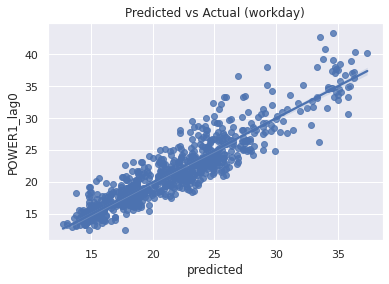

In [28]:
# actual data vs observed data 
F['HOURS'] = np.arange(len(F))
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1_lag0", data=F).set(title='Predicted vs Actual (workday)')

[Text(0.5, 1.0, 'Predicted vs Actual ( December/workdays )')]

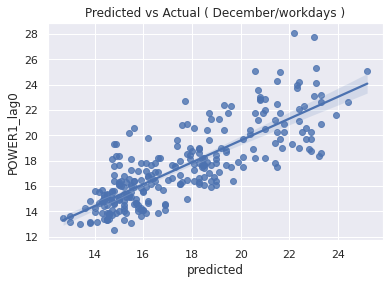

In [29]:
# actual data vs observed data (Monthly) we choose December as an example
act_obs_month=F[(F['Month'] == 12)]
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1_lag0", data=act_obs_month).set(title='Predicted vs Actual ( December/workdays )')

[Text(0.5, 1.0, 'Predicted vs Actual (Tuesday/winter)')]

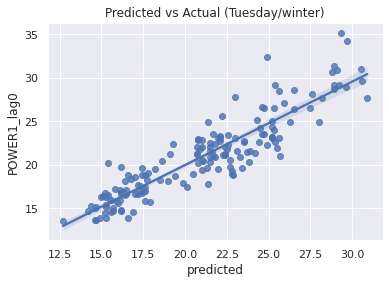

In [30]:
# actual data vs observed data (daily) we choose Tuesday as an example
act_obs_day=F[(F['Week_Day'] =='TUE')]
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1_lag0", data=act_obs_day).set(title='Predicted vs Actual (Tuesday/winter)')

[Text(0.5, 1.0, 'HOURS vs residuals')]

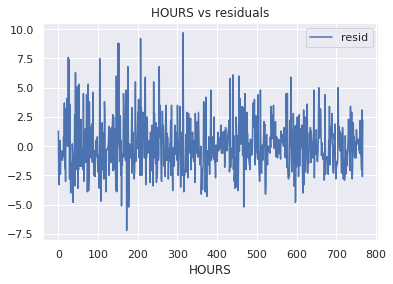

In [31]:
#residual over  time
F.plot.line(x='HOURS', y='resid').set(title='HOURS vs residuals')

Text(0.5, 1.0, 'NORMAL Q-Q Residual Plot (winter/workdays)')

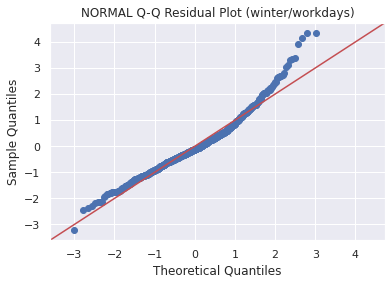

In [32]:
#Normal Q-Q plot 
import statsmodels.api as sm
sm.qqplot(F.standardized_residuals, line ='45')
plt.title("NORMAL Q-Q Residual Plot (winter/workdays)")

(-5.0, 5.0)

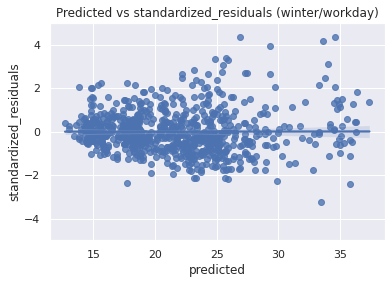

In [33]:
# Prediction vs standardized  residual
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="standardized_residuals", data=F).set(title='Predicted vs standardized_residuals (winter/workday)')
plt.ylim(-5, 5)

(-5.0, 5.0)

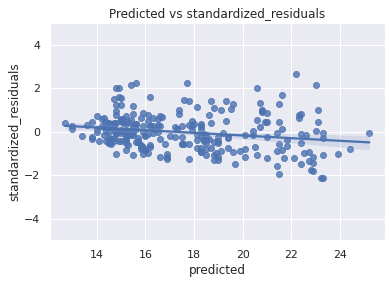

In [34]:
# Prediction vs standardized  residual(monthly)
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="standardized_residuals", data=act_obs_month).set(title='Predicted vs standardized_residuals')
plt.ylim(-5, 5)


(-5.0, 5.0)

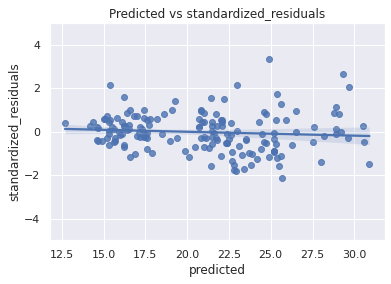

In [35]:
# Prediction vs standardized  residual(daily)
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="standardized_residuals", data=act_obs_day).set(title='Predicted vs standardized_residuals')
plt.ylim(-5, 5)

(-20.0, 20.0)

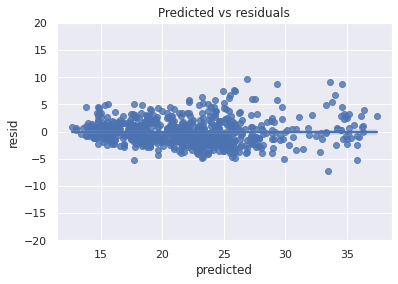

In [36]:
# Prediction vs residual 
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="resid", data=F).set(title='Predicted vs residuals')
plt.ylim(-20, 20)

(10.0, 50.0)

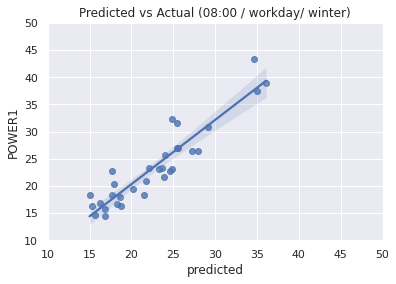

In [37]:
# actual data vs observed data (hourly) # example at 8:00
#remove duplicated columns in the dataframe 
F =F.T.drop_duplicates().T
act_obs_hour=F[(F['Hour_day'] ==8)]
new_act_obs_hour=act_obs_hour[['POWER1','predicted']].apply(pd.to_numeric,downcast='float')
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1", data=new_act_obs_hour).set(title='Predicted vs Actual (08:00 / workday/ winter)')
plt.ylim(10, 50)
plt.xlim(10, 50)

In [38]:
#@title  Pre modelling step: (Winter term/ Weekends model/ Model B)


In [39]:
#For the weekend days we repeat the same process before. (Saturday, Sunday)
weekend_day_model=winter_model[(winter_model['Week_Day'] == 'SAT') | (winter_model['Week_Day'] == 'SUN')]
weekend_day_model

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
72,2019-01-05 00:00:00,5,5,1,2019,97,0,SAT,-3.6,0.7,...,13.2,5.8,5.0,4.9,5.3,5.1,5.2,5.1,4.8,4.9
73,2019-01-05 01:00:00,5,5,1,2019,98,1,SAT,-4.2,1.2,...,34.0,13.2,5.8,5.0,4.9,5.3,5.1,5.2,5.1,4.8
74,2019-01-05 02:00:00,5,5,1,2019,99,2,SAT,-4.9,1.0,...,53.8,34.0,13.2,5.8,5.0,4.9,5.3,5.1,5.2,5.1
75,2019-01-05 03:00:00,5,5,1,2019,100,3,SAT,-5.2,1.8,...,59.7,53.8,34.0,13.2,5.8,5.0,4.9,5.3,5.1,5.2
76,2019-01-05 04:00:00,5,5,1,2019,101,4,SAT,-5.6,2.1,...,38.5,59.7,53.8,34.0,13.2,5.8,5.0,4.9,5.3,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2019-12-29 19:00:00,363,29,12,2019,8708,19,SUN,-0.2,3.9,...,5.3,5.4,5.3,5.0,5.0,4.4,4.4,4.9,4.8,4.8
2084,2019-12-29 20:00:00,363,29,12,2019,8709,20,SUN,-0.1,5.2,...,5.0,5.3,5.4,5.3,5.0,5.0,4.4,4.4,4.9,4.8
2085,2019-12-29 21:00:00,363,29,12,2019,8710,21,SUN,0.4,6.1,...,5.4,5.0,5.3,5.4,5.3,5.0,5.0,4.4,4.4,4.9
2086,2019-12-29 22:00:00,363,29,12,2019,8711,22,SUN,0.7,6.7,...,5.8,5.4,5.0,5.3,5.4,5.3,5.0,5.0,4.4,4.4


In [40]:
# We split the dataset into training and testing data.
# we filter the dataset into odd and even days (the even days will represent the testing data  )
testing_data_weekend=weekend_day_model[weekend_day_model.Day_month % 2==0]
testing_data_weekend

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
96,2019-01-06 00:00:00,6,6,1,2019,121,0,SUN,-8.6,0.5,...,10.6,2.9,2.6,2.6,2.4,2.1,1.8,1.0,1.2,0.7
97,2019-01-06 01:00:00,6,6,1,2019,122,1,SUN,-8.2,0.4,...,29.0,10.6,2.9,2.6,2.6,2.4,2.1,1.8,1.0,1.2
98,2019-01-06 02:00:00,6,6,1,2019,123,2,SUN,-8.0,0.7,...,41.0,29.0,10.6,2.9,2.6,2.6,2.4,2.1,1.8,1.0
99,2019-01-06 03:00:00,6,6,1,2019,124,3,SUN,-7.6,2.1,...,69.8,41.0,29.0,10.6,2.9,2.6,2.6,2.4,2.1,1.8
100,2019-01-06 04:00:00,6,6,1,2019,125,4,SUN,-7.3,2.6,...,46.3,69.8,41.0,29.0,10.6,2.9,2.6,2.6,2.4,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2019-12-28 19:00:00,362,28,12,2019,8684,19,SAT,-3.1,4.8,...,5.1,4.9,5.0,5.0,5.0,4.8,4.7,4.9,5.1,4.6
2060,2019-12-28 20:00:00,362,28,12,2019,8685,20,SAT,-3.2,4.8,...,5.1,5.1,4.9,5.0,5.0,5.0,4.8,4.7,4.9,5.1
2061,2019-12-28 21:00:00,362,28,12,2019,8686,21,SAT,-3.1,4.9,...,5.1,5.1,5.1,4.9,5.0,5.0,5.0,4.8,4.7,4.9
2062,2019-12-28 22:00:00,362,28,12,2019,8687,22,SAT,-3.2,4.4,...,4.8,5.1,5.1,5.1,4.9,5.0,5.0,5.0,4.8,4.7


In [41]:
#(the odd days will represent the training data  )
training_data_weekend=weekend_day_model[weekend_day_model.Day_month % 2==1]
training_data_weekend

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
72,2019-01-05 00:00:00,5,5,1,2019,97,0,SAT,-3.6,0.7,...,13.2,5.8,5.0,4.9,5.3,5.1,5.2,5.1,4.8,4.9
73,2019-01-05 01:00:00,5,5,1,2019,98,1,SAT,-4.2,1.2,...,34.0,13.2,5.8,5.0,4.9,5.3,5.1,5.2,5.1,4.8
74,2019-01-05 02:00:00,5,5,1,2019,99,2,SAT,-4.9,1.0,...,53.8,34.0,13.2,5.8,5.0,4.9,5.3,5.1,5.2,5.1
75,2019-01-05 03:00:00,5,5,1,2019,100,3,SAT,-5.2,1.8,...,59.7,53.8,34.0,13.2,5.8,5.0,4.9,5.3,5.1,5.2
76,2019-01-05 04:00:00,5,5,1,2019,101,4,SAT,-5.6,2.1,...,38.5,59.7,53.8,34.0,13.2,5.8,5.0,4.9,5.3,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2019-12-29 19:00:00,363,29,12,2019,8708,19,SUN,-0.2,3.9,...,5.3,5.4,5.3,5.0,5.0,4.4,4.4,4.9,4.8,4.8
2084,2019-12-29 20:00:00,363,29,12,2019,8709,20,SUN,-0.1,5.2,...,5.0,5.3,5.4,5.3,5.0,5.0,4.4,4.4,4.9,4.8
2085,2019-12-29 21:00:00,363,29,12,2019,8710,21,SUN,0.4,6.1,...,5.4,5.0,5.3,5.4,5.3,5.0,5.0,4.4,4.4,4.9
2086,2019-12-29 22:00:00,363,29,12,2019,8711,22,SUN,0.7,6.7,...,5.8,5.4,5.0,5.3,5.4,5.3,5.0,5.0,4.4,4.4


In [42]:
# To avoid error syntax in the training and testing sets, we convert the integers dummy variables (calendar data) to floats : 

In [43]:
# we convert the  integers dummy variables (calendar data)  to floats. (training_data_weekend dataframe)
training_data_weekend[['Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h']]= training_data_weekend[['Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h']].apply(pd.to_numeric,downcast='float')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# we convert the  integers dummy variables (calendar data)  to floats. (testing_data_weekend dataframe)
testing_data_weekend[['Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h']]= testing_data_weekend[['Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h']].apply(pd.to_numeric,downcast='float')

In [ ]:
#@title Modelling Step : ARX Model (Winter term/ Workdays model/ Model B)


In [ ]:
# We apply the same steps that have been used to construct the ARX Model for the workdays to the weekends. 


In [44]:
#Separation of indeppendent variables and dependent variables

import pandas as pd
import statsmodels.api as sm
X = training_data_weekend[['POWER1_lag1','POWER1_lag2','POWER1_lag3','Temperature_lag0','Irradiation.flux_lag0','Irradiation.flux_lag1','Irradiation.flux_lag2','Irradiation.flux_lag11','Irradiation.flux_lag12','Saturday 10h','Sunday 10h']] 
Y = training_data_weekend['POWER1_lag0']

In [45]:
# we fit our model using the ols method . 
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            POWER1_lag0   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     76.03
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           5.68e-80
Time:                        19:25:40   Log-Likelihood:                -710.25
No. Observations:                 312   AIC:                             1445.
Df Residuals:                     300   BIC:                             1489.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

In [46]:
# Some of the variables neeed to be renamed to avoid error syntax. 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

F1=training_data_weekend.rename(columns={'Saturday 0h':'Saturday_0h','Saturday 1h':'Saturday_1h','Saturday 2h':'Saturday_2h','Saturday 3h':'Saturday_3h','Saturday 4h':'Saturday_4h','Saturday 5h':'Saturday_5h','Saturday 6h':'Saturday_6h','Saturday 7h':'Saturday_7h','Saturday 8h':'Saturday_8h','Saturday 9h':'Saturday_9h','Saturday 10h':'Saturday_10h','Saturday 11h':'Saturday_11h','Saturday 12h':'Saturday_12h','Saturday 13h':'Saturday_13h','Saturday 14h':'Saturday_14h',
'Saturday 15h':'Saturday_15h','Saturday 16h':'Saturday_16h','Saturday 17h':'Saturday_17h','Saturday 18h':'Saturday_18h','Saturday 19h':'Saturday_19h','Saturday 20h':'Saturday_20h','Saturday 21h':'Saturday_21h','Saturday 22h':'Saturday_22h','Saturday 23h':'Saturday_23h','Sunday 0h':'Sunday_0h','Sunday 1h':'Sunday_1h','Sunday 2h':'Sunday_2h','Sunday 3h':'Sunday_3h','Sunday 4h':'Sunday_4h','Sunday 5h':'Sunday_5h','Sunday 6h':'Sunday_6h','Sunday 7h':'Sunday_7h','Sunday 8h':'Sunday_8h','Sunday 9h':'Sunday_9h','Sunday 10h':'Sunday_10h','Sunday 11h':'Sunday_11h','Sunday 12h':'Sunday_12h','Sunday 13h':'Sunday_13h','Sunday 14h':'Sunday_14h',
'Sunday 15h':'Sunday_15h','Sunday 16h':'Sunday_16h','Sunday 17h':'Sunday_17h','Sunday 18h':'Sunday_18h','Sunday 19h':'Sunday_19h','Sunday 20h':'Sunday_20h','Sunday 21h':'Sunday_21h','Sunday 22h':'Sunday_22h','Sunday 23h':'Sunday_23h','Irradiation.flux_lag0':'Irradiation_flux_lag0','Irradiation.flux_lag1':'Irradiation_flux_lag1','Irradiation.flux_lag2':'Irradiation_flux_lag2','Irradiation.flux_lag3':'Irradiation_flux_lag3','Irradiation.flux_lag4':'Irradiation_flux_lag4','Irradiation.flux_lag5':'Irradiation_flux_lag5','Irradiation.flux_lag6':'Irradiation_flux_lag6','Irradiation.flux_lag7':'Irradiation_flux_lag7','Irradiation.flux_lag8':'Irradiation_flux_lag8','Irradiation.flux_lag9':'Irradiation_flux_lag9','Irradiation.flux_lag10':'Irradiation_flux_lag10',
'Irradiation.flux_lag11':'Irradiation_flux_lag11','Irradiation.flux_lag12':'Irradiation_flux_lag12','Irradiation.flux_lag13':'Irradiation_flux_lag13','Irradiation.flux_lag14':'Irradiation_flux_lag14','Irradiation.flux_lag15':'Irradiation_flux_lag15','Irradiation.flux_lag16':'Irradiation_flux_lag16','Irradiation.flux_lag17':'Irradiation_flux_lag17','Irradiation.flux_lag18':'Irradiation_flux_lag18','Irradiation.flux_lag19':'Irradiation_flux_lag19','Irradiation.flux_lag20':'Irradiation_flux_lag20','Irradiation.flux_lag21':'Irradiation_flux_lag21','Irradiation.flux_lag22':'Irradiation_flux_lag22','Irradiation.flux_lag23':'Irradiation_flux_lag23','Irradiation.flux_lag24':'Irradiation_flux_lag24','Bank Holidays':'Bank_Holidays'})

#we add three columns (predicted values + residual values + standardized_residuals) to the dataframe (training data) in order to use them later when we see the quality of our model using graphical residual analysis. 
KJB = smf.ols('POWER1_lag0 ~ POWER1_lag1 + POWER1_lag2 + POWER1_lag3 + Temperature_lag0 + Irradiation_flux_lag0 + Irradiation_flux_lag1 + Irradiation_flux_lag2 + Irradiation_flux_lag11 + Irradiation_flux_lag12  + Saturday_2h + Sunday_10h',F1).fit()
F1['resid'] = KJB.resid
F1['predicted'] = KJB.predict(F1)
F1['resid']=F1['resid'].round(1)
F1.loc[:,'predicted'] =  KJB.predict(F1)
F1['predicted']=F1['predicted'].round(1)
F1['standardized_residuals'] = KJB.get_influence().resid_studentized_internal
F1


,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
72,2019-01-05 00:00:00,5,5,1,2019,97,0,SAT,-3.6,0.7,...,4.9,5.3,5.1,5.2,5.1,4.8,4.9,1.9,23.3,0.798623
73,2019-01-05 01:00:00,5,5,1,2019,98,1,SAT,-4.2,1.2,...,5.0,4.9,5.3,5.1,5.2,5.1,4.8,-0.4,23.6,-0.156103
74,2019-01-05 02:00:00,5,5,1,2019,99,2,SAT,-4.9,1.0,...,5.8,5.0,4.9,5.3,5.1,5.2,5.1,0.5,21.1,0.247541
75,2019-01-05 03:00:00,5,5,1,2019,100,3,SAT,-5.2,1.8,...,13.2,5.8,5.0,4.9,5.3,5.1,5.2,1.6,23.8,0.638497
76,2019-01-05 04:00:00,5,5,1,2019,101,4,SAT,-5.6,2.1,...,34.0,13.2,5.8,5.0,4.9,5.3,5.1,-2.8,24.3,-1.140632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2019-12-29 19:00:00,363,29,12,2019,8708,19,SUN,-0.2,3.9,...,5.0,5.0,4.4,4.4,4.9,4.8,4.8,-3.8,20.5,-1.556801
2084,2019-12-29 20:00:00,363,29,12,2019,8709,20,SUN,-0.1,5.2,...,5.3,5.0,5.0,4.4,4.4,4.9,4.8,4.8,20.3,2.016539
2085,2019-12-29 21:00:00,363,29,12,2019,8710,21,SUN,0.4,6.1,...,5.4,5.3,5.0,5.0,4.4,4.4,4.9,1.1,20.7,0.442517
2086,2019-12-29 22:00:00,363,29,12,2019,8711,22,SUN,0.7,6.7,...,5.3,5.4,5.3,5.0,5.0,4.4,4.4,-0.2,19.3,-0.091092


In [ ]:
#convert the dataframe into new excel file.
# create an excel writer object 
with pd.ExcelWriter("10259(winter_weekends)_after_model_fitting.xlsx") as writer: 
    
 F1.to_excel(writer, sheet_name="0", index=False) 
# Note: This uploaded file is for the training data. 

# In the second source code 'Model Evaluation to predict the heat load', we will need the testing data. Particularly in the section of 'Comparison of Models performance with Different Data Scenarios'
# when we reach that section all we need to do is to go back to these lines of code and running it using the testing data. ( we replace training_data.rename with testing_data.rename above)
# Hence we can can create another excel file for the testing data. Name of the file : 10259(winter_workdays)_after_model_fitting_testing_data.xlsx0

# KJB = smf.ols('POWER1_lag0 ~ POWER1_lag1 + POWER1_lag2 + POWER1_lag3 + POWER1_lag12 + Temperature_lag0 + Temperature_lag1 +Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Tuesday_1h + Friday_16h + Monday_8h',F).fit()
# In this code line above, before uploading the testing data file, we need to replace the input parameters with the optimal* one. 
# *The optimal parameters are selected after we We calibrate and refit the model for prediction purpose. (This process is done in the next source code titled 'Model Evaluation to predict the heat load' )

In [47]:
#@title  Model Quality (Model B)==> Graphical Residual Analysis

In [48]:
# We conduct graphical residual analysis in which several plots were represented to check if our assumption are reasonable and whether 
#the choice of our model are appropriate or not. 

(10.0, 40.0)

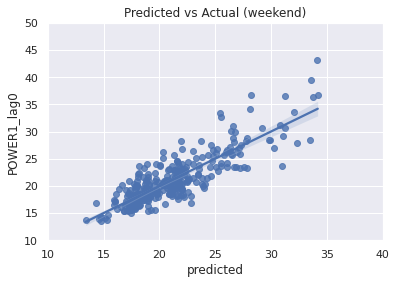

In [49]:
# actual data vs observed data 
F1['HOURS'] = np.arange(len(F1))
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1_lag0", data=F1).set(title='Predicted vs Actual (weekend)')
plt.ylim(10, 50)
plt.xlim(10, 40)

[Text(0.5, 1.0, 'Predicted vs Actual (December/weekend)')]

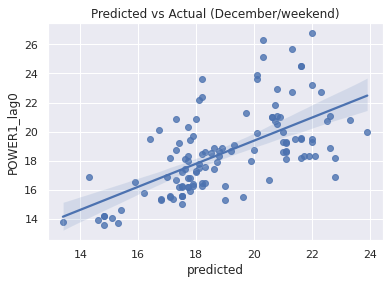

In [50]:
# actual data vs observed data (Monthly) we choose December as an example
act_obs_month_weekend=F1[(F1['Month'] ==12)]
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1_lag0", data=act_obs_month_weekend).set(title='Predicted vs Actual (December/weekend)')


[Text(0.5, 1.0, 'Predicted vs Actual')]

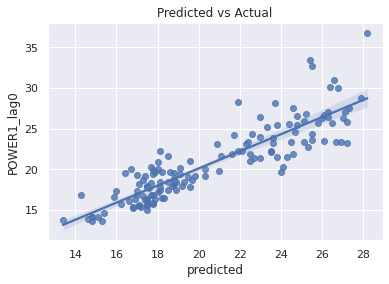

In [51]:
# actual data vs observed data (daily) # we choose Saturday as an example
act_obs_day_weekend=F1[(F1['Week_Day'] =='SAT')] 
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1_lag0", data=act_obs_day_weekend).set(title='Predicted vs Actual')

[Text(0.5, 1.0, 'HOURS vs residuals')]

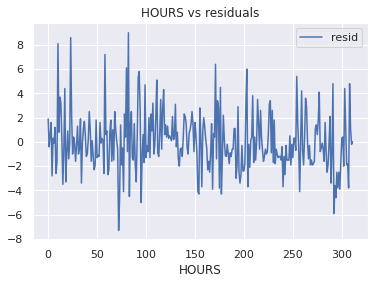

In [52]:
#residual over  time
F1.plot.line(x='HOURS', y='resid').set(title='HOURS vs residuals')

Text(0.5, 1.0, 'NORMAL Q-Q Residual Plot (winter/weekends)')

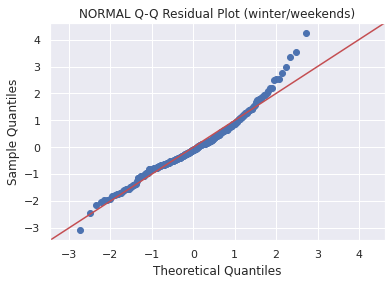

In [53]:
#Normal Q-Q plot 
import statsmodels.api as sm
sm.qqplot(F1.standardized_residuals, line ='45')
plt.title("NORMAL Q-Q Residual Plot (winter/weekends)")

(-5.0, 5.0)

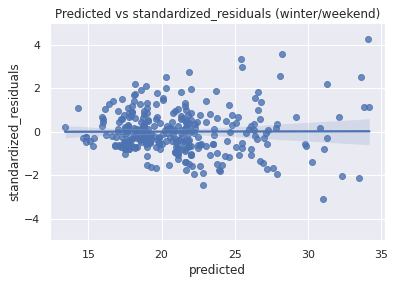

In [54]:
# Prediction vs standardized  residual
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="standardized_residuals", data=F1).set(title='Predicted vs standardized_residuals (winter/weekend)')
plt.ylim(-5, 5)

(-5.0, 5.0)

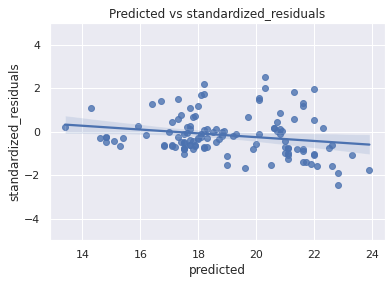

In [55]:
# Prediction vs standardized  residual(monthly)
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="standardized_residuals", data=act_obs_month_weekend).set(title='Predicted vs standardized_residuals')
plt.ylim(-5, 5)

(-5.0, 5.0)

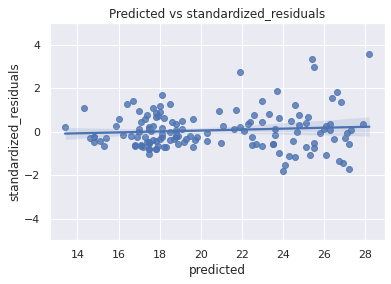

In [56]:
# Prediction vs standardized  residual(daily)
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="standardized_residuals", data=act_obs_day_weekend).set(title='Predicted vs standardized_residuals')
plt.ylim(-5, 5)

(-20.0, 20.0)

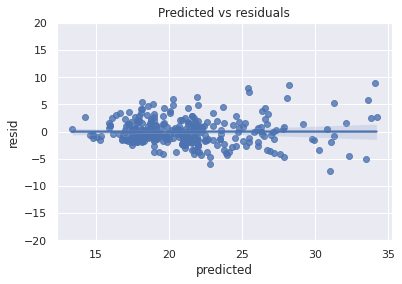

In [57]:
# Prediction vs residual 
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="resid", data=F1).set(title='Predicted vs residuals')
plt.ylim(-20, 20)

(10.0, 50.0)

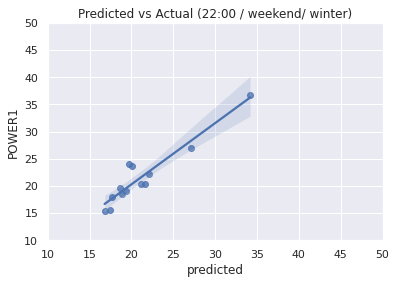

In [58]:
# actual data vs observed data (hourly) # example at 22:00 
#remove duplicated columns in the dataframe 
F1 =F1.T.drop_duplicates().T
act_obs_hour_weekend=F1[(F1['Hour_day'] ==22)]
new_act_obs_hour_weekend=act_obs_hour_weekend[['POWER1','predicted']].apply(pd.to_numeric,downcast='float')
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="POWER1", data=new_act_obs_hour_weekend).set(title='Predicted vs Actual (22:00 / weekend/ winter)')
plt.ylim(10, 50)
plt.xlim(10, 50)